In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/icecream')))

327
391
47
59


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
18/18 [==============================] - 508s 28s/step - loss: 0.8080 - accuracy: 0.6122 - val_loss: 0.4088 - val_accuracy: 0.8462
Epoch 2/30
18/18 [==============================] - 95s 5s/step - loss: 0.4817 - accuracy: 0.7774 - val_loss: 0.3756 - val_accuracy: 0.8671
Epoch 3/30
18/18 [==============================] - 97s 5s/step - loss: 0.3239 - accuracy: 0.8643 - val_loss: 0.2908 - val_accuracy: 0.8881
Epoch 4/30
18/18 [==============================] - 93s 5s/step - loss: 0.2253 - accuracy: 0.9061 - val_loss: 0.3029 - val_accuracy: 0.8811
Epoch 5/30
18/18 [==============================] - 103s 6s/step - loss: 0.1236 - accuracy: 0.9530 - val_loss: 0.3995 - val_accuracy: 0.8881
Epoch 6/30
18/18 [==============================] - 97s 5s/step - loss: 0.3793 - accuracy: 0.8417 - val_loss: 0.4575 - val_accuracy: 0.7622
Epoch 7/30
18/18 [==============================] - 94s 5s/step - loss: 0.2210 - accuracy: 0.9165 - val_loss: 0.3551 - val_accuracy: 0.8531
Epoch 8/30
18/18 

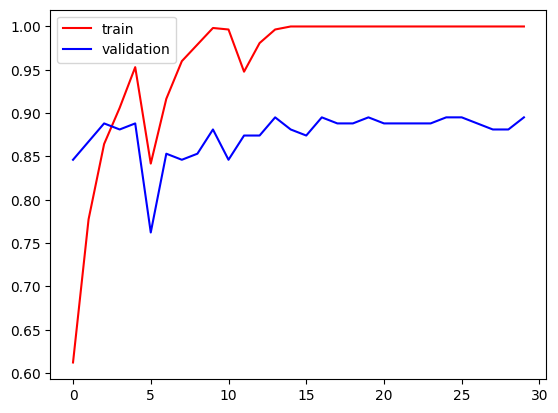

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

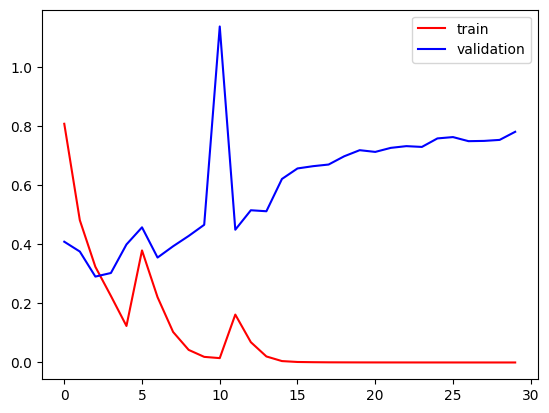

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 55s 18s/step
[[9.99999881e-01]
 [3.07413579e-08]
 [9.99999285e-01]
 [1.00000000e+00]
 [2.07926030e-03]
 [6.13384368e-03]
 [5.40090241e-07]
 [1.00000000e+00]
 [9.99999881e-01]
 [2.72311755e-08]
 [1.05175939e-08]
 [7.04463688e-04]
 [6.53619566e-07]
 [1.00000000e+00]
 [9.70209539e-01]
 [9.61185992e-02]
 [1.24827102e-06]
 [2.49281729e-04]
 [9.98378932e-01]
 [8.54758680e-01]
 [7.01338460e-04]
 [4.04912814e-09]
 [9.66907024e-01]
 [9.26968217e-01]
 [9.99999821e-01]
 [1.66298114e-02]
 [6.74313654e-08]
 [9.55371380e-01]
 [1.56837260e-12]
 [4.08453792e-02]
 [4.51595247e-01]
 [2.79476750e-04]
 [8.51296703e-04]
 [9.99965489e-01]
 [2.71785595e-02]
 [9.99999225e-01]
 [2.50892622e-08]
 [2.71057543e-05]
 [3.86005377e-05]
 [1.46400021e-06]
 [9.99989986e-01]
 [1.00000000e+00]
 [9.99999642e-01]
 [1.00000000e+00]
 [1.47242026e-05]
 [1.00000000e+00]
 [2.80155330e-08]
 [1.28909815e-02]
 [3.03734355e-02]
 [9.90754247e-01]
 [1.00000000e+00]
 [1.94962008e-03]
 [2.63056951

In [13]:
len(predictions)

106

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[36 23]
 [24 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61        59
           1       0.50      0.49      0.49        47

    accuracy                           0.56       106
   macro avg       0.55      0.55      0.55       106
weighted avg       0.56      0.56      0.56       106

